<a href="https://www.kaggle.com/code/rinichristy/finding-the-best-regressor?scriptVersionId=95543071" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Finding the Best Regressor to Predict Fuel Consumption of vehicles**
Part 2 of Best Predictors and Classifiers for Predicting Fuel Consumption of vehicles<br>
Part 1: [Best Predictors for Fuel Consumption of Vehicles](https://www.kaggle.com/rinichristy/best-predictors-for-fuel-consumption-of-vehicles)

## **Table of Contents**

  * [Data Set Information: Fuel Consumption Data Set](#Information)<br></br>
  * [Load the Fuel Consumption dataset](#Dataset)<br></br>
  * [Data Preprocessing](#Preprocessing)<br></br>
  * [Building Models](#Model)<br></br>
  * [Final Assessment of Models ](#Final)<br></br>
    


### **Import Libraries & Primary modules**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## **Dataset Information** <a name="DatasetInformation"></a>
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)

## **Load the Fuel Consumption dataset**<a name = "Dataset"></a>

In [2]:
df = pd.read_csv("../input/2022-fuel-consumption-ratings/MY2022 Fuel Consumption Ratings.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## **Data Preprocessing**<a name = 'Preprocessing'></a>

### **Label Encoding**
Some features in this dataset are categorical such as Vehicle Class,Transmission, and Fuel Type. Unfortunately, Sklearn models do not handle categorical variables. OrdinalEncoder from scikit learn, which allows multi-column encoding can be used to convert categorical features in numerical data type.

In [3]:
z = df[['Vehicle Class', 'Transmission', 'Fuel Type']]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
z = enc.fit_transform(z)
df[['Vehicle Class', 'Transmission', 'Fuel Type']] = pd.DataFrame(z)
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,0.0,2.4,4,7.0,3.0,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,7.0,3.5,6,8.0,3.0,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,7.0,2.0,4,8.0,3.0,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,7.0,2.0,4,8.0,3.0,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,0.0,2.0,4,8.0,3.0,11.2,8.0,9.8,29,230,5,7


## **Building Models**<a name = 'Model'></a>

The following algorithms are going to be used to build regression models:<br>
* Linear Regressor
* Ridge Regressor
* Lasso Regressor
* ElasticNet Regressor
* KNeighbors Regressor
* Support Vector Regressor
* Decision Tree Regressor
* Extra Trees Regressor
* Random Forest Regressor
* Bagging Regressor
* AdaBoost Regressor
* Gradient Boosting Regressor
* XGB Regressor
* CatBoost Regressor

### **Linear Regression Model**
Appyling features with highest scores obtained from feature importance and also confirmed throgh backward elimination from Part 1

In [4]:
X = df[['Engine Size(L)', 'Transmission', 'CO2 Emissions(g/km)', 'Smog Rating']]
y = df['Fuel Consumption(Comb (L/100 km))']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
from sklearn import linear_model
mlm = linear_model.LinearRegression()
mlm.fit (X_train, y_train)


Yhat_mlm = mlm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Multiple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_mlm))
print('Mean Squared Error(MSE) of Multiple Linear regression:', metrics.mean_squared_error(y_test, Yhat_mlm))
print('Root Mean Squared Error (RMSE) of Multiple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_mlm)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Multiple Linear regression: %.2f' % mlm.score(X_train, y_train))
print('Explained Variance Score (EVS) of Multiple Linear regression:',explained_variance_score(y_test, Yhat_mlm))
#Residual sum of squares (rss)
print("Residual sum of squares of Multiple Linear regression: %.2f" % np.mean((Yhat_mlm - y_test) ** 2))
print('R2 of Multiple Linear regression:',metrics.r2_score(y_test, Yhat_mlm))
print('R2 rounded of Multiple Linear regression:',(metrics.r2_score(y_test, Yhat_mlm)).round(2))
r2 = r2_score(y_test, Yhat_mlm)
r2_rounded = r2_score(y_test, Yhat_mlm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Multiple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = mlm.score(X_test, y_test)
print("Accuracy of Multiple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Multiple Linear regression: 0.20703732828298543
Mean Squared Error(MSE) of Multiple Linear regression: 0.34929888939055787
Root Mean Squared Error (RMSE) of Multiple Linear regression: 0.5910151346543994
Variance score of Multiple Linear regression: 0.94
Explained Variance Score (EVS) of Multiple Linear regression: 0.964230094463358
Residual sum of squares of Multiple Linear regression: 0.35
R2 of Multiple Linear regression: 0.963964799667796
R2 rounded of Multiple Linear regression: 0.96
Adjusted_r2 of Multiple Linear regression:  0.963
Accuracy of Multiple Linear regression: 0.963964799667796


### **Ridge Regression Model**

In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit (X_train, y_train)
Yhat_ridge = ridge.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Ridge regression:', metrics.mean_absolute_error(y_test, Yhat_ridge))
print('Mean Squared Error(MSE) of Ridge regression:', metrics.mean_squared_error(y_test, Yhat_ridge))
print('Root Mean Squared Error (RMSE) of Ridge regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ridge)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Ridge regression: %.2f' % ridge.score(X_train, y_train))
print('Explained Variance Score (EVS) of Ridge regression:',explained_variance_score(y_test, Yhat_ridge))
#Residual sum of squares (rss)
print("Residual sum of squares of Ridge regression: %.2f" % np.mean((Yhat_ridge - y_test) ** 2))
print('R2 of Ridge regression:',metrics.r2_score(y_test, Yhat_ridge))
print('R2 rounded of Ridge regression:',(metrics.r2_score(y_test, Yhat_ridge)).round(2))
r2 = r2_score(y_test, Yhat_ridge)
r2_rounded = r2_score(y_test, Yhat_ridge).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Ridge regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = ridge.score(X_test, y_test)
print("Accuracy of Ridge regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Ridge regression: 0.20694852078911324
Mean Squared Error(MSE) of Ridge regression: 0.34931390811212404
Root Mean Squared Error (RMSE) of Ridge regression: 0.591027840386664
Variance score of Ridge regression: 0.94
Explained Variance Score (EVS) of Ridge regression: 0.9642282541558223
Residual sum of squares of Ridge regression: 0.35
R2 of Ridge regression: 0.9639632502708274
R2 rounded of Ridge regression: 0.96
Adjusted_r2 of Ridge regression:  0.963
Accuracy of Ridge regression: 0.9639632502708274


### **Lasso Regression Model**

In [6]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit (X_train, y_train)
Yhat_lasso = lasso.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Lasso regression:', metrics.mean_absolute_error(y_test, Yhat_lasso))
print('Mean Squared Error(MSE) of Lasso regression:', metrics.mean_squared_error(y_test, Yhat_lasso))
print('Root Mean Squared Error (RMSE) of Lasso regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_lasso)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Lasso regression: %.2f' % lasso.score(X_train, y_train))
print('Explained Variance Score (EVS) of Lasso regression:',explained_variance_score(y_test, Yhat_lasso))
#Residual sum of squares (rss)
print("Residual sum of squares of Lasso regression: %.2f" % np.mean((Yhat_lasso - y_test) ** 2))
print('R2 of Lasso regression:',metrics.r2_score(y_test, Yhat_lasso))
print('R2 rounded of Lasso regression:',(metrics.r2_score(y_test, Yhat_lasso)).round(2))
r2 = r2_score(y_test, Yhat_lasso)
r2_rounded = r2_score(y_test, Yhat_lasso).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Lasso regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = lasso.score(X_test, y_test)
print("Accuracy of Lasso regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Lasso regression: 0.17105398702764701
Mean Squared Error(MSE) of Lasso regression: 0.3719194035120652
Root Mean Squared Error (RMSE) of Lasso regression: 0.6098519521261412
Variance score of Lasso regression: 0.94
Explained Variance Score (EVS) of Lasso regression: 0.9617549359163855
Residual sum of squares of Lasso regression: 0.37
R2 of Lasso regression: 0.9616311685491624
R2 rounded of Lasso regression: 0.96
Adjusted_r2 of Lasso regression:  0.961
Accuracy of Lasso regression: 0.9616311685491624


### **ElasticNet Regression Model**

In [7]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit (X_train, y_train)
Yhat_ElasticNet = ElasticNet.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of ElasticNet regression:', metrics.mean_absolute_error(y_test, Yhat_ElasticNet))
print('Mean Squared Error(MSE) of ElasticNet regression:', metrics.mean_squared_error(y_test, Yhat_ElasticNet))
print('Root Mean Squared Error (RMSE) of ElasticNet regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ElasticNet)))
# Explained variance score: 1 is perfect prediction
print('Variance score of ElasticNet regression: %.2f' % ElasticNet.score(X_train, y_train))
print('Explained Variance Score (EVS) of ElasticNet regression:',explained_variance_score(y_test, Yhat_ElasticNet))
#Residual sum of squares (rss)
print("Residual sum of squares of ElasticNet regression: %.2f" % np.mean((Yhat_ElasticNet - y_test) ** 2))
print('R2 of ElasticNet regression:',metrics.r2_score(y_test, Yhat_ElasticNet))
print('R2 rounded of ElasticNet regression:',(metrics.r2_score(y_test, Yhat_ElasticNet)).round(2))
r2 = r2_score(y_test, Yhat_ElasticNet)
r2_rounded = r2_score(y_test, Yhat_ElasticNet).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of ElasticNet regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = ElasticNet.score(X_test, y_test)
print("Accuracy of ElasticNet regression: {}".format(accuracy))

Mean Absolute Error(MAE) of ElasticNet regression: 0.174168528747642
Mean Squared Error(MSE) of ElasticNet regression: 0.3724368256337448
Root Mean Squared Error (RMSE) of ElasticNet regression: 0.610276024134772
Variance score of ElasticNet regression: 0.94
Explained Variance Score (EVS) of ElasticNet regression: 0.9617001081392554
Residual sum of squares of ElasticNet regression: 0.37
R2 of ElasticNet regression: 0.9615777890212642
R2 rounded of ElasticNet regression: 0.96
Adjusted_r2 of ElasticNet regression:  0.961
Accuracy of ElasticNet regression: 0.9615777890212642


### **K Neighbors Regression Model**

In [8]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit (X_train, y_train)
Yhat_KNR = KNR.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of K Neighbors regression:', metrics.mean_absolute_error(y_test, Yhat_KNR))
print('Mean Squared Error(MSE) of K Neighbors regression:', metrics.mean_squared_error(y_test, Yhat_KNR))
print('Root Mean Squared Error (RMSE) of K Neighbors regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_KNR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of K Neighbors regression: %.2f' % KNR.score(X_train, y_train))
print('Explained Variance Score (EVS) of K Neighbors regression:',explained_variance_score(y_test, Yhat_KNR))
#Residual sum of squares (rss)
print("Residual sum of squares of K Neighbors regression: %.2f" % np.mean((Yhat_KNR - y_test) ** 2))
print('R2 of K Neighbors regression:',metrics.r2_score(y_test, Yhat_KNR))
print('R2 rounded of K Neighbors regression:',(metrics.r2_score(y_test, Yhat_KNR)).round(2))
r2 = r2_score(y_test, Yhat_KNR)
r2_rounded = r2_score(y_test, Yhat_KNR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of K Neighbors regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = KNR.score(X_test, y_test)
print("Accuracy of K Neighbors regression: {}".format(accuracy))

Mean Absolute Error(MAE) of K Neighbors regression: 0.22694736842105273
Mean Squared Error(MSE) of K Neighbors regression: 0.47081684210526326
Root Mean Squared Error (RMSE) of K Neighbors regression: 0.6861609447536804
Variance score of K Neighbors regression: 0.96
Explained Variance Score (EVS) of K Neighbors regression: 0.9514354310631808
Residual sum of squares of K Neighbors regression: 0.47
R2 of K Neighbors regression: 0.951428476469993
R2 rounded of K Neighbors regression: 0.95
Adjusted_r2 of K Neighbors regression:  0.95
Accuracy of K Neighbors regression: 0.951428476469993


### **Support Vector Regression Model**

In [9]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit (X_train, y_train)
Yhat_SVR = SVR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Support Vector regression:', metrics.mean_absolute_error(y_test, Yhat_SVR))
print('Mean Squared Error(MSE) of Support Vector regression:', metrics.mean_squared_error(y_test, Yhat_SVR))
print('Root Mean Squared Error (RMSE) of Support Vector regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_SVR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Support Vector regression: %.2f' % SVR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Support Vector regression:',explained_variance_score(y_test, Yhat_SVR))
#Residual sum of squares (rss)
print("Residual sum of squares of Support Vector regression: %.2f" % np.mean((Yhat_SVR - y_test) ** 2))
print('R2 of Support Vector regression:',metrics.r2_score(y_test, Yhat_SVR))
print('R2 rounded of Support Vector regression:',(metrics.r2_score(y_test, Yhat_SVR)).round(2))
r2 = r2_score(y_test, Yhat_SVR)
r2_rounded = r2_score(y_test, Yhat_SVR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Support Vector regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = SVR.score(X_test, y_test)
print("Accuracy of Support Vector regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Support Vector regression: 0.24388933838891705
Mean Squared Error(MSE) of Support Vector regression: 0.8067777763253763
Root Mean Squared Error (RMSE) of Support Vector regression: 0.8982080918837105
Variance score of Support Vector regression: 0.92
Explained Variance Score (EVS) of Support Vector regression: 0.9171550583175171
Residual sum of squares of Support Vector regression: 0.81
R2 of Support Vector regression: 0.9167692778978505
R2 rounded of Support Vector regression: 0.92
Adjusted_r2 of Support Vector regression:  0.915
Accuracy of Support Vector regression: 0.9167692778978505


### **Decision Tree Regression Model**

In [10]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit (X_train, y_train)
Yhat_DTR = DTR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Decision Tree regression:', metrics.mean_absolute_error(y_test, Yhat_DTR))
print('Mean Squared Error(MSE) of Decision Tree regression:', metrics.mean_squared_error(y_test, Yhat_DTR))
print('Root Mean Squared Error (RMSE) of Decision Tree regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_DTR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Decision Tree regression: %.2f' % DTR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Decision Tree regression:',explained_variance_score(y_test, Yhat_DTR))
#Residual sum of squares (rss)
print("Residual sum of squares of Decision Tree regression: %.2f" % np.mean((Yhat_DTR - y_test) ** 2))
print('R2 of Decision Tree regression:',metrics.r2_score(y_test, Yhat_DTR))
print('R2 rounded of Decision Tree regression:',(metrics.r2_score(y_test, Yhat_DTR)).round(2))
r2 = r2_score(y_test, Yhat_DTR)
r2_rounded = r2_score(y_test, Yhat_DTR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Decision Tree regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = DTR.score(X_test, y_test)
print("Accuracy of Decision Tree regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Decision Tree regression: 0.19731578947368436
Mean Squared Error(MSE) of Decision Tree regression: 0.698148947368421
Root Mean Squared Error (RMSE) of Decision Tree regression: 0.8355530787259544
Variance score of Decision Tree regression: 1.00
Explained Variance Score (EVS) of Decision Tree regression: 0.9280173859685766
Residual sum of squares of Decision Tree regression: 0.70
R2 of Decision Tree regression: 0.9279759027461184
R2 rounded of Decision Tree regression: 0.93
Adjusted_r2 of Decision Tree regression:  0.926
Accuracy of Decision Tree regression: 0.9279759027461184


### **Extra Trees Regression Model**

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit (X_train, y_train)
Yhat_ETR = ETR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Extra Trees regression:', metrics.mean_absolute_error(y_test, Yhat_ETR))
print('Mean Squared Error(MSE) of Extra Trees regression:', metrics.mean_squared_error(y_test, Yhat_ETR))
print('Root Mean Squared Error (RMSE) of Extra Trees regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_ETR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Extra Trees regression: %.2f' % ETR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Extra Trees regression:',explained_variance_score(y_test, Yhat_ETR))
#Residual sum of squares (rss)
print("Residual sum of squares of Extra Trees regression: %.2f" % np.mean((Yhat_ETR - y_test) ** 2))
print('R2 of Extra Trees regression:',metrics.r2_score(y_test, Yhat_ETR))
print('R2 rounded of Extra Trees regression:',(metrics.r2_score(y_test, Yhat_ETR)).round(2))
r2 = r2_score(y_test, Yhat_ETR)
r2_rounded = r2_score(y_test, Yhat_ETR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Extra Trees regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = ETR.score(X_test, y_test)
print("Accuracy of Extra Trees regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Extra Trees regression: 0.15360842105263509
Mean Squared Error(MSE) of Extra Trees regression: 0.32023020189473733
Root Mean Squared Error (RMSE) of Extra Trees regression: 0.5658888600200019
Variance score of Extra Trees regression: 1.00
Explained Variance Score (EVS) of Extra Trees regression: 0.9669715900671971
Residual sum of squares of Extra Trees regression: 0.32
R2 of Extra Trees regression: 0.9669636525388537
R2 rounded of Extra Trees regression: 0.97
Adjusted_r2 of Extra Trees regression:  0.966
Accuracy of Extra Trees regression: 0.9669636525388537


### **Random Forest Regression Model**

In [12]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit (X_train, y_train)
Yhat_RFR = RFR.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Random Forest regression:', metrics.mean_absolute_error(y_test, Yhat_RFR))
print('Mean Squared Error(MSE) of Random Forest regression:', metrics.mean_squared_error(y_test, Yhat_RFR))
print('Root Mean Squared Error (RMSE) of Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_RFR)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Random Forest regression: %.2f' % RFR.score(X_train, y_train))
print('Explained Variance Score (EVS) of Random Forest regression:',explained_variance_score(y_test, Yhat_RFR))
#Residual sum of squares (rss)
print("Residual sum of squares of Random Forest regression: %.2f" % np.mean((Yhat_RFR - y_test) ** 2))
print('R2 of Random Forest regression:',metrics.r2_score(y_test, Yhat_RFR))
print('R2 rounded of Random Forest regression:',(metrics.r2_score(y_test, Yhat_RFR)).round(2))
r2 = r2_score(y_test, Yhat_RFR)
r2_rounded = r2_score(y_test, Yhat_RFR).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Random Forest regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = RFR.score(X_test, y_test)
print("Accuracy of Random Forest regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Random Forest regression: 0.21891295112781964
Mean Squared Error(MSE) of Random Forest regression: 0.5036598752489596
Root Mean Squared Error (RMSE) of Random Forest regression: 0.7096899853097546
Variance score of Random Forest regression: 0.99
Explained Variance Score (EVS) of Random Forest regression: 0.9481578650101118
Residual sum of squares of Random Forest regression: 0.50
R2 of Random Forest regression: 0.948040245602969
R2 rounded of Random Forest regression: 0.95
Adjusted_r2 of Random Forest regression:  0.947
Accuracy of Random Forest regression: 0.948040245602969


### **Bagging Regression Model**

In [13]:
from sklearn.ensemble import BaggingRegressor
Bagging = BaggingRegressor()
Bagging.fit (X_train, y_train)
Yhat_Bagging = Bagging.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Bagging regression:', metrics.mean_absolute_error(y_test, Yhat_Bagging))
print('Mean Squared Error(MSE) of Bagging regression:', metrics.mean_squared_error(y_test, Yhat_Bagging))
print('Root Mean Squared Error (RMSE) of Bagging regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_Bagging)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Bagging regression: %.2f' % Bagging.score(X_train, y_train))
print('Explained Variance Score (EVS) of Bagging regression:',explained_variance_score(y_test, Yhat_Bagging))
#Residual sum of squares (rss)
print("Residual sum of squares of Bagging regression: %.2f" % np.mean((Yhat_Bagging - y_test) ** 2))
print('R2 of Bagging regression:',metrics.r2_score(y_test, Yhat_Bagging))
print('R2 rounded of Bagging regression:',(metrics.r2_score(y_test, Yhat_Bagging)).round(2))
r2 = r2_score(y_test, Yhat_Bagging)
r2_rounded = r2_score(y_test, Yhat_Bagging).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Bagging regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = Bagging.score(X_test, y_test)
print("Accuracy of Bagging regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Bagging regression: 0.22984949874686728
Mean Squared Error(MSE) of Bagging regression: 0.5909631823024825
Root Mean Squared Error (RMSE) of Bagging regression: 0.76874129738325
Variance score of Bagging regression: 0.99
Explained Variance Score (EVS) of Bagging regression: 0.93918311681554
Residual sum of squares of Bagging regression: 0.59
R2 of Bagging regression: 0.9390336548152725
R2 rounded of Bagging regression: 0.94
Adjusted_r2 of Bagging regression:  0.938
Accuracy of Bagging regression: 0.9390336548152725


### **AdaBoost Regression Model**

In [14]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost = AdaBoostRegressor()
AdaBoost.fit (X_train, y_train)
Yhat_AdaBoost = AdaBoost.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of AdaBoost regression:', metrics.mean_absolute_error(y_test, Yhat_AdaBoost))
print('Mean Squared Error(MSE) of AdaBoost regression:', metrics.mean_squared_error(y_test, Yhat_AdaBoost))
print('Root Mean Squared Error (RMSE) of AdaBoost regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_AdaBoost)))
# Explained variance score: 1 is perfect prediction
print('Variance score of AdaBoost regression: %.2f' % AdaBoost.score(X_train, y_train))
print('Explained Variance Score (EVS) of AdaBoost regression:',explained_variance_score(y_test, Yhat_AdaBoost))
#Residual sum of squares (rss)
print("Residual sum of squares of AdaBoost regression: %.2f" % np.mean((Yhat_AdaBoost - y_test) ** 2))
print('R2 of AdaBoost regression:',metrics.r2_score(y_test, Yhat_AdaBoost))
print('R2 rounded of AdaBoost regression:',(metrics.r2_score(y_test, Yhat_AdaBoost)).round(2))
r2 = r2_score(y_test, Yhat_AdaBoost)
r2_rounded = r2_score(y_test, Yhat_AdaBoost).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of AdaBoost regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = AdaBoost.score(X_test, y_test)
print("Accuracy of AdaBoost regression: {}".format(accuracy))

Mean Absolute Error(MAE) of AdaBoost regression: 0.6506069305503898
Mean Squared Error(MSE) of AdaBoost regression: 0.7821647806049296
Root Mean Squared Error (RMSE) of AdaBoost regression: 0.8844008031457963
Variance score of AdaBoost regression: 0.90
Explained Variance Score (EVS) of AdaBoost regression: 0.932963895092525
Residual sum of squares of AdaBoost regression: 0.78
R2 of AdaBoost regression: 0.9193084621280365
R2 rounded of AdaBoost regression: 0.92
Adjusted_r2 of AdaBoost regression:  0.918
Accuracy of AdaBoost regression: 0.9193084621280365


### **Gradient Boosting Regression Model**

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit (X_train, y_train)
Yhat_GB = GB.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Gradient Boosting regression:', metrics.mean_absolute_error(y_test, Yhat_GB))
print('Mean Squared Error(MSE) of Gradient Boosting regression:', metrics.mean_squared_error(y_test, Yhat_GB))
print('Root Mean Squared Error (RMSE) of Gradient Boosting regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_GB)))
# Explained variance score: 1 is perfect prediction
print('Variance score of Gradient Boosting regression: %.2f' % GB.score(X_train, y_train))
print('Explained Variance Score (EVS) of Gradient Boosting regression:',explained_variance_score(y_test, Yhat_GB))
#Residual sum of squares (rss)
print("Residual sum of squares of Gradient Boosting regression: %.2f" % np.mean((Yhat_GB - y_test) ** 2))
print('R2 of Gradient Boosting regression:',metrics.r2_score(y_test, Yhat_GB))
print('R2 rounded of Gradient Boosting regression:',(metrics.r2_score(y_test, Yhat_GB)).round(2))
r2 = r2_score(y_test, Yhat_GB)
r2_rounded = r2_score(y_test, Yhat_GB).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Gradient Boosting regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = GB.score(X_test, y_test)
print("Accuracy of Gradient Boosting regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Gradient Boosting regression: 0.21153416210586193
Mean Squared Error(MSE) of Gradient Boosting regression: 0.3161061192982306
Root Mean Squared Error (RMSE) of Gradient Boosting regression: 0.5622331538589934
Variance score of Gradient Boosting regression: 0.98
Explained Variance Score (EVS) of Gradient Boosting regression: 0.9674631570389575
Residual sum of squares of Gradient Boosting regression: 0.32
R2 of Gradient Boosting regression: 0.9673891109272584
R2 rounded of Gradient Boosting regression: 0.97
Adjusted_r2 of Gradient Boosting regression:  0.967
Accuracy of Gradient Boosting regression: 0.9673891109272584


### **XGBoost Regression Model**

In [16]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit (X_train, y_train)
Yhat_XGB = XGB.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of XG Boost regression:', metrics.mean_absolute_error(y_test, Yhat_XGB))
print('Mean Squared Error(MSE) of XG Boost regression:', metrics.mean_squared_error(y_test, Yhat_XGB))
print('Root Mean Squared Error (RMSE) of XG Boost regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_XGB)))
# Explained variance score: 1 is perfect prediction
print('Variance score of XG Boost regression: %.2f' % XGB.score(X_train, y_train))
print('Explained Variance Score (EVS) of XG Boost regression:',explained_variance_score(y_test, Yhat_XGB))
#Residual sum of squares (rss)
print("Residual sum of squares of XG Boost regression: %.2f" % np.mean((Yhat_XGB - y_test) ** 2))
print('R2 of XG Boost regression:',metrics.r2_score(y_test, Yhat_XGB))
print('R2 rounded of XG Boost regression:',(metrics.r2_score(y_test, Yhat_XGB)).round(2))
r2 = r2_score(y_test, Yhat_XGB)
r2_rounded = r2_score(y_test, Yhat_XGB).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of XG Boost regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = XGB.score(X_test, y_test)
print("Accuracy of XG Boost regression: {}".format(accuracy))

Mean Absolute Error(MAE) of XG Boost regression: 0.20221239541706293
Mean Squared Error(MSE) of XG Boost regression: 0.3760312471377053
Root Mean Squared Error (RMSE) of XG Boost regression: 0.6132138673723102
Variance score of XG Boost regression: 1.00
Explained Variance Score (EVS) of XG Boost regression: 0.9612079246898233
Residual sum of squares of XG Boost regression: 0.38
R2 of XG Boost regression: 0.9612069727864929
R2 rounded of XG Boost regression: 0.96
Adjusted_r2 of XG Boost regression:  0.96
Accuracy of XG Boost regression: 0.9612069727864929


### **CatBoost Regression Model**

In [17]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(loss_function='RMSE', learning_rate = 0.1, max_depth = 5, n_estimators = 100, silent = True)
cat.fit(X_train, y_train)
Yhat_cat = cat.predict(X_test)

k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of CatBoost regression:', metrics.mean_absolute_error(y_test, Yhat_cat))
print('Mean Squared Error(MSE) of CatBoost regression:', metrics.mean_squared_error(y_test, Yhat_cat))
print('Root Mean Squared Error (RMSE) of CatBoost regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_cat)))
# Explained variance score: 1 is perfect prediction
print('Variance score of CatBoost regression: %.2f' % cat.score(X_train, y_train))
print('Explained Variance Score (EVS) of CatBoost regression:',explained_variance_score(y_test, Yhat_cat))
#Residual sum of squares (rss)
print("Residual sum of squares of CatBoost regression: %.2f" % np.mean((Yhat_cat - y_test) ** 2))
print('R2 of CatBoost regression:',metrics.r2_score(y_test, Yhat_cat))
print('R2 rounded of CatBoost regression:',(metrics.r2_score(y_test, Yhat_cat)).round(2))
r2 = r2_score(y_test, Yhat_cat)
r2_rounded = r2_score(y_test, Yhat_cat).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of CatBoost regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = cat.score(X_test, y_test)
print("Accuracy of CatBoost regression: {}".format(accuracy))

Mean Absolute Error(MAE) of CatBoost regression: 0.24417738720924106
Mean Squared Error(MSE) of CatBoost regression: 0.33202465639425893
Root Mean Squared Error (RMSE) of CatBoost regression: 0.5762158071367524
Variance score of CatBoost regression: 0.97
Explained Variance Score (EVS) of CatBoost regression: 0.9657471979245643
Residual sum of squares of CatBoost regression: 0.33
R2 of CatBoost regression: 0.965746885055164
R2 rounded of CatBoost regression: 0.97
Adjusted_r2 of CatBoost regression:  0.965
Accuracy of CatBoost regression: 0.965746885055164


### **Final Assessment of Models**<a name ='Final'></a>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [19]:
Models=[("Linear Regression",LinearRegression()),
        ("Ridge", Ridge()),
        ("Lasso", Lasso()),
        ("ElasticNet", ElasticNet()),
        ("KNR",KNeighborsRegressor()),
        ("SVR",SVR()),
        ("Decision Tree",DecisionTreeRegressor()),
        ("Extra Trees",ExtraTreesRegressor()),
        ("Random Forest",RandomForestRegressor()),
        ("Bagging",BaggingRegressor()),
        ("AdaBoost",AdaBoostRegressor()),
        ("GradientBoosting",GradientBoostingRegressor()),
        ("XGB",XGBRegressor()),
        ("CatBoost",CatBoostRegressor(loss_function='RMSE', learning_rate = 0.1, max_depth = 5, n_estimators = 100, silent = True))]

Model_output=[]
for name,model in Models:
    yhat=model.fit(X_train, y_train).predict(X_test)
    MAE = metrics.mean_absolute_error(y_test, yhat)
    MSE = metrics.mean_squared_error(y_test, yhat)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, yhat))
    Variance_score = model.score(X_train, y_train)
    Explained_Variance_score= explained_variance_score(y_test, yhat)
    R2_score = r2_score(y_test, yhat)
    Train_set_MAE = metrics.mean_absolute_error(y_train, model.predict(X_train))
    Model_output.append((name, Train_set_MAE, MAE,MSE,RMSE, Variance_score, Explained_Variance_score,R2_score))
    final_Report=pd.DataFrame(Model_output, columns=['Algorithm','Train_set_MAE', 'MAE', 'MSE', 'RMSE', 'Variance_score', 'Explained_Variance_score','R2 score'])
        
final_Report

,Algorithm,Train_set_MAE,MAE,MSE,RMSE,Variance_score,Explained_Variance_score,R2 score
0,Linear Regression,0.222000,0.207037,0.349299,0.591015,0.940082,0.964230,0.963965
1,Ridge,0.221901,0.206949,0.349314,0.591028,0.940082,0.964228,0.963963
2,Lasso,0.187417,0.171054,0.371919,0.609852,0.938724,0.961755,0.961631
3,ElasticNet,0.189730,0.174169,0.372437,0.610276,0.938747,0.961700,0.961578
4,KNR,0.177857,0.226947,0.470817,0.686161,0.961410,0.951435,0.951428
5,SVR,0.217619,0.243889,0.806778,0.898208,0.921022,0.917155,0.916769
6,Decision Tree,0.007884,0.194158,0.696044,0.834292,0.998763,0.928259,0.928193
7,Extra Trees,0.007920,0.152950,0.316992,0.563020,0.998763,0.967321,0.967298
8,Random Forest,0.070517,0.215621,0.510800,0.714703,0.993772,0.947427,0.947304
9,Bagging,0.075445,0.221096,0.471968,0.686999,0.992498,0.951439,0.951310


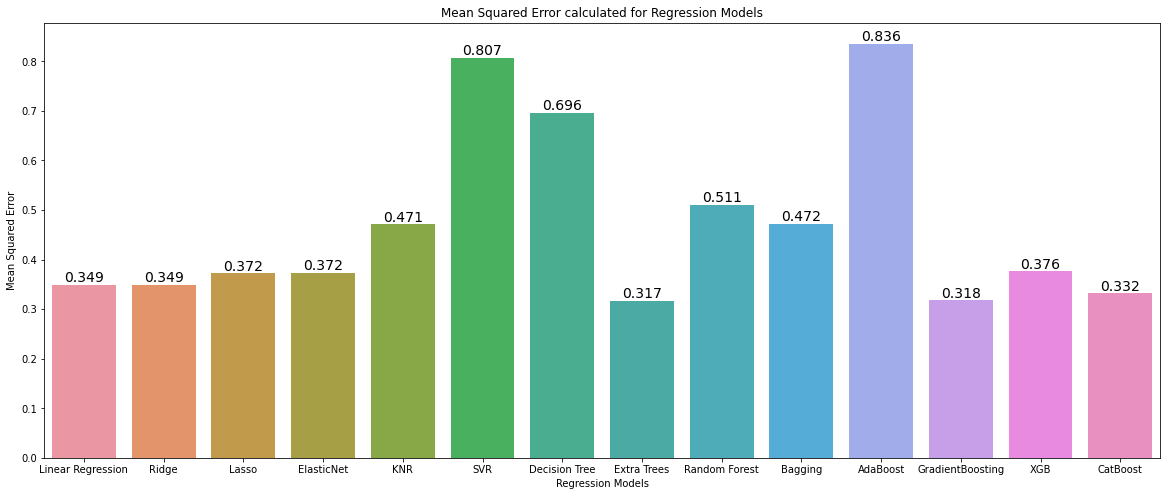

In [20]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = 'Algorithm', y = 'MSE', data = final_Report)
ax.set_xlabel('Regression Models')
ax.set_ylabel('Mean Squared Error')
plt.title("Mean Squared Error calculated for Regression Models")
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, 
                str(height.round(3)), ha='center', va='bottom', fontsize = 14);

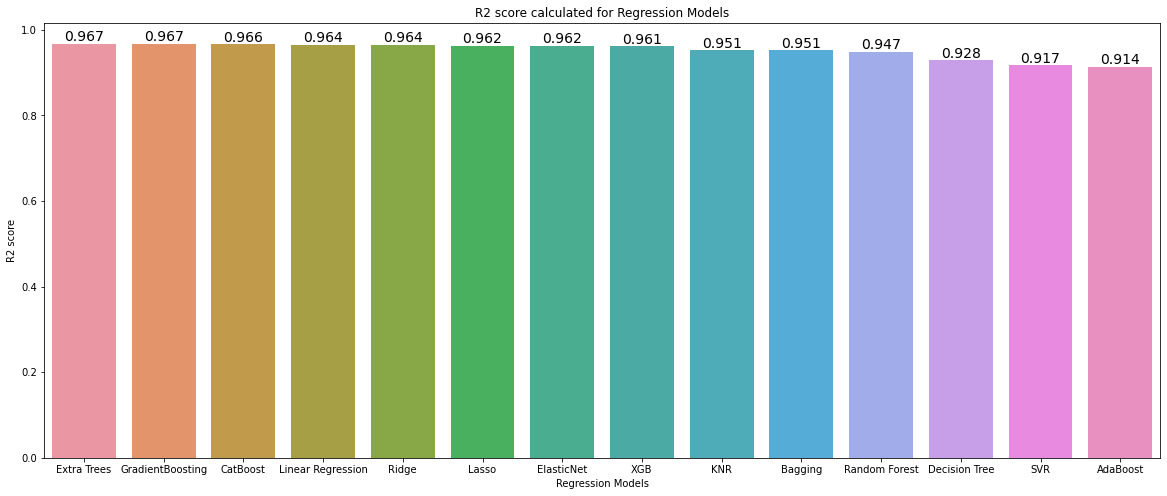

In [21]:
final_Report_sorted = final_Report.sort_values("R2 score", ascending = False)
plt.figure(figsize = (20,8))
ax = sns.barplot(x = 'Algorithm', y = 'R2 score', data = final_Report_sorted)
ax.set_xlabel('Regression Models')
ax.set_ylabel('R2 score')
plt.title("R2 score calculated for Regression Models")
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height, 
                str(height.round(3)), ha='center', va='bottom', fontsize = 14);